Los métodos de integración básicamente consisten en el cálculo de la primitiva y el cálculo de integrales definidas en el intervalo $(a,b)$. 

Veamos algunos ejemplos.

In [1]:
import sympy
from sympy import *
from sympy.vector import *
init_printing()

1. Integrales directas

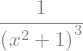

In [2]:
x = symbols('x')
f=1/(1+x**2)**3
f

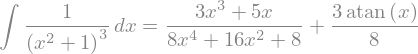

In [3]:
Eq(Integral(f,x),integrate(f,x))

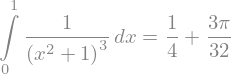

In [4]:
Eq(Integral(f,[x,0,1]),integrate(f,[x,0,1]))

Podemos hacer un cambio de variable

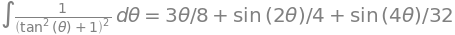

In [5]:
θ = symbols('θ')
f_s = f.subs(x, tan(θ))
dx_s = diff(tan(θ), θ)
f_n = f_s*dx_s
Eq(Integral(f_n,θ),integrate(f_n,θ).simplify())

Otro ejemplo

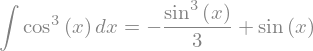

In [6]:
f=cos(x)**3
Eq(Integral(f,x),integrate(f,x).simplify())

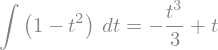

In [7]:
t = symbols('t')
f_s = f.subs(x, asin(t))
dx_s = diff(asin(t), t)
f_n = f_s*dx_s
Eq(Integral(f_n,t),integrate(f_n,t).simplify())

2. Puede suceder que al integrar una función, por ejemplo 

In [8]:
def f(x):
   return exp(x**3+2*x)
f(x)

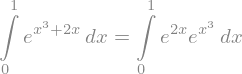

In [9]:
Eq(Integral(f(x),[x,0,1]),integrate(f(x),[x,0,1]))

El programa nos devuelve la integral sin resolver, en este caso SymPy nos está indicando que fue incapaz de realizar el cálculo de manera algebraica. 

Ahora bien, podemos disponer de rutinas numéricas que nos mostrará una lista con el valor numérico de la integral, el error absoluto estimado de la aproximación. Pero debemos recurrir a un ambiete de cálculo diferente al SymPy, en este caso "scipy", más información en: \url{https://scipy.github.io/devdocs/index.html}

La función "scipy.integrate.quad" en SciPy  se utiliza para realizar integración numérica de una función a lo largo de un intervalo dado. Utiliza un algoritmo de cuadratura adaptativa para aproximar la integral de la función tomado de la biblioteca QUADPACK de Fortran.  Una vez que se completa la integración, "quad" devuelve el valor aproximado de la integral, así como una estimación del error asociado con la aproximación.

In [10]:
from scipy.integrate import quad
result_quad, error_quad = quad(lambda x:f(x), 0, 1)
result_quad, error_quad

La función "scipy.integrate.romberg" implementa el método de Romberg para la integración numérica de una función en un intervalo dado. El método de Romberg es un algoritmo de extrapolación que mejora la convergencia de la regla del trapecio al combinar diferentes aproximaciones de la integral. Una vez que se completa la integración  devuelve el valor aproximado de la integral, así como una estimación del error asociado con la aproximación. Ver también \url{https://es.wikipedia.org/wiki/M%C3%A9todo_de_Romberg}

In [11]:
from scipy.integrate import  romberg
integral_romberg = romberg(lambda x: f(x), 0, 1)
integral_romberg.evalf()

3. Ahora veamos la manera de calcular integrales del tipo 
$$
\int_C f(x, y, z) \mathrm{d}{\bf r} \,,
$$
donde la curva $C$ viene dada por medio de algún parámetro $\tau$, es decir que la integral se puede escribir como:
$$
\int_a^b f({\bf r} (\tau)) | {\bf r}' (\tau)|    \mathrm{d}{\tau} \,.
$$

Dada la función $f=x^2+y^2$

In [12]:
y,τ = symbols('y τ')
def f(x,y):
   return x**2+y**2
f(x,y)

Vamos a integrar siguiendo el camino dado por la curva parametrizada con: $x=\cos(\tau), y=\, \mathrm{sen}(3\tau)$

In [13]:
x_sub = cos(τ)
y_sub = sin(3*τ)
dr = [diff(x_sub, τ), diff(y_sub, τ)]

In [14]:
f_sub = f(x,y).subs({x: x_sub, y: y_sub})
dr_dot = sqrt(dr[0]**2 + dr[1]**2)
fn = f_sub*dr_dot
fn

In [15]:
integral_romberg = romberg(lambda t: (fn.subs(τ,t)*dr_dot.subs(τ,t)), 0, 2)
integral_romberg.evalf()

4.  Queremos ahora evaluar la integral
$$
\oint_C x \ \mathrm{d}y\,,
$$
$C$ es el círculo: $x^2+y^2=a^2$, $z=0$. Con: $x=a\cos(\theta)$,  $y=a\, \mathrm{sen}(\theta)$, y el parámetro $\theta$ variando de $0$ a $2\pi$. 

In [16]:
def f(x):
   return x

In [17]:
a = symbols('a')
x_sub = a*cos(τ)
y_sub = a*sin(τ)
dr = [diff(x_sub, τ), diff(y_sub, τ)]
dr

In [18]:
f_sub = f(x).subs({x: x_sub})
fn = f_sub*dr[1]
fn

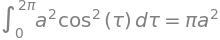

In [19]:
Eq(Integral(fn,[τ,0,2*pi]),integrate(fn,[τ,0,2*pi]))

5.  Calculemos la integral 
$$
\int_{C}{\bf a}\cdot\mathrm{d}{\bf r}
$$
donde ${\bf a}=(2x+y){i}+(y-2x){j}$ y $C$ en términos de un parámetro es $x=2\lambda^2+2\lambda$, $y=\lambda+1$.

In [20]:
x, y, λ = symbols('x, y, λ')
A = [2*x + y, y - 2*x]
A

In [21]:
x_sub = 2*λ**2 + 2*λ
y_sub = λ + 1
dr = [diff(x_sub, λ), diff(y_sub, λ)]

In [22]:
A_sub = [A[0].subs({x: x_sub,y: y_sub}), A[1].subs({x: x_sub,y: y_sub})]

In [23]:
integrando = A_sub[0]*dr[0] + A_sub[1]*dr[1]
integrando

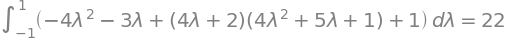

In [24]:
Eq(Integral(integrando,(λ, -1, 1)),integrate(integrando,(λ, -1, 1)).trigsimp())

Para integrales múltiples de manera directa  podamos integrar aplicando varias veces la función "integrate"

6. Si quisiéramos calcular el área de una elipse
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}=1\,,
$$
podríamos hacer lo siguiente: calculamos el área en el primer cuadrante determinado por $0 \leq x\leq X$, donde:

$X=(a/b)\sqrt{b^2-y^2}$ 

y donde

$0 \leq y\leq Y$, con $X=(b/a)\sqrt{a^2-x^2}$. 

Por lo tanto, el área es
$$
A=4\int_0^b\left[\int_0^X    \mathrm{d}x \right] \mathrm{d}y
$$
donde $ {\rm d}A= \mathrm{d}x \mathrm{d}y$.

Definimos los símbolos y las expresiones

In [25]:
a, b, x, y = symbols('a b x y', real=True, positive=True)
X = (a/b)*sqrt(b**2-y**2)
Y = (b/a)*sqrt(a**2-x**2)

Cálculo de la integral doble

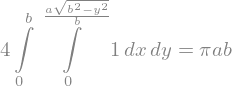

In [26]:
Eq(4*Integral(Integral(1,(x,0,X)),(y,0,b)),4*integrate(integrate(1,(x,0,X)),(y,0,b)))